# **Mnist图像分类**

## **torchvision的使用**
torchvision主要包含四个模块
- torchvision.datasets：一些常用数据集加载的接口
- torchvision.model：常用的一些视觉模型，比如AlexNet，VGG，ResNet等
- torchvision.transforms：常用的图像变换方式
- torchvision.utils：其他的一些常用方法

## **数据集生成**

In [1]:
import torch
import torchvision
import torchvision.transforms as tranforms
import matplotlib.pyplot as plt
import time
import sys
sys.path.append(r'C:\D\ProgramFile\jupyter\torch_learn\dive_to_dp\utils')
import d2lzh as d2l

我们分别加载训练集和测试集，加载的原始格式是PIL格式，排列方式是NHWC，我们使用transforms的ToTensor方法转化为Tensor，转化会变成NCHW的排列

In [2]:
mnist_train = torchvision.datasets.FashionMNIST(root='../datasets/FashionMnist', 
                                                train=True, download=True, transform=tranforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='../datasets/FashionMnist', 
                                                train=False, download=True, transform=tranforms.ToTensor())

In [3]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [4]:
feature, label = mnist_train[0]
print(feature.shape, label)

torch.Size([1, 28, 28]) 9


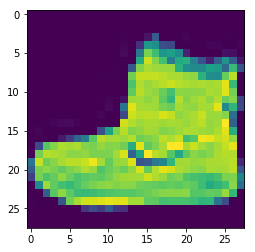

In [5]:
plt.imshow(feature.view(28, 28))

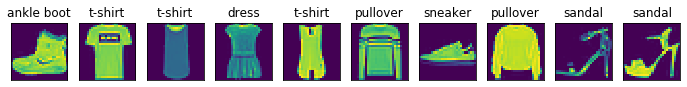

In [6]:
x = []; y = []
for i in range(10):
    x.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
d2l.show_fashion_mnist(x, d2l.get_fashion_mnist_labels(y))

## **batch处理**

In [7]:
batch_size = 256
# 这个判断控制是否加速处理
if sys.platform.startswith('win'):
    num_works = 0
else:
    num_works = 4

In [8]:
type(mnist_train)

torchvision.datasets.mnist.FashionMNIST

DataLoader可以接受来自torchvision下datasets的输入

In [9]:
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, 
                                         shuffle=True, num_workers=num_works)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                       shuffle=False, num_workers=num_works)

## **模型定义**

In [12]:
class FlattenLayer(torch.nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0], -1)

In [13]:
num_inputs = 784
num_outputs = 10

In [14]:
from collections import OrderedDict

net = torch.nn.Sequential(OrderedDict([
    ('flatten', FlattenLayer()),
    ('linear', torch.nn.Linear(num_inputs, num_outputs))
]))

In [16]:
# 初始化
torch.nn.init.normal_(net.linear.weight, mean=0, std=0.01)
torch.nn.init.constant_(net.linear.bias, val=0.0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [17]:
# 损失函数
loss = torch.nn.CrossEntropyLoss()
# 优化
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

## **训练**

In [18]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch1:loss 0.0031 train_acc 0.7496 test_acc 0.7601
epoch2:loss 0.0022 train_acc 0.8134 test_acc 0.8088
epoch3:loss 0.0021 train_acc 0.8259 test_acc 0.8212
epoch4:loss 0.0020 train_acc 0.8322 test_acc 0.8230
epoch5:loss 0.0019 train_acc 0.8372 test_acc 0.8251
